# Imports

In [18]:
from common import Common
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
import statistics
import _pickle as pickle
import collections
import re
import operator
%matplotlib inline
%config InlineBackend.figure_format ='retina'

# BPE Model Performance

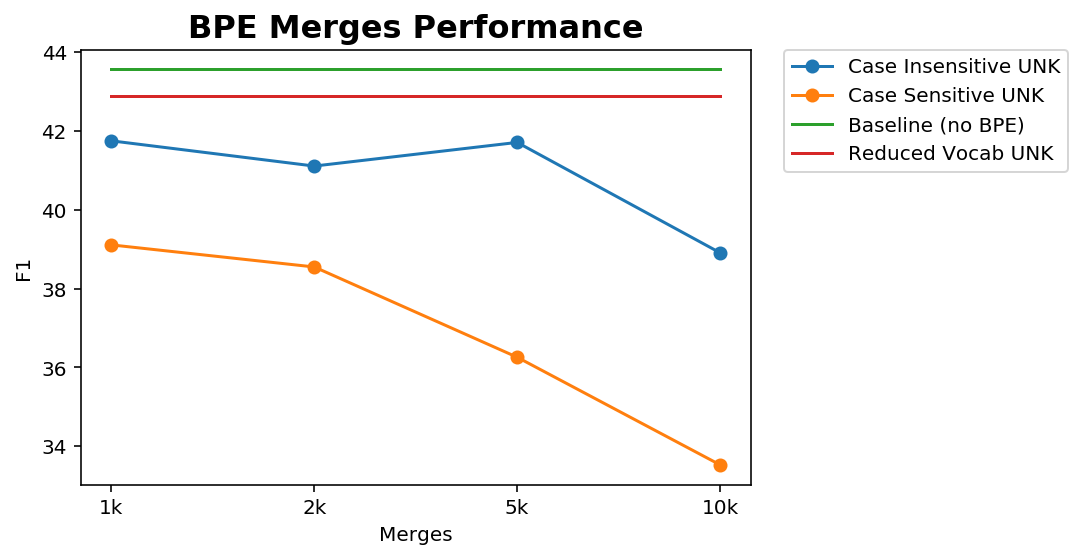

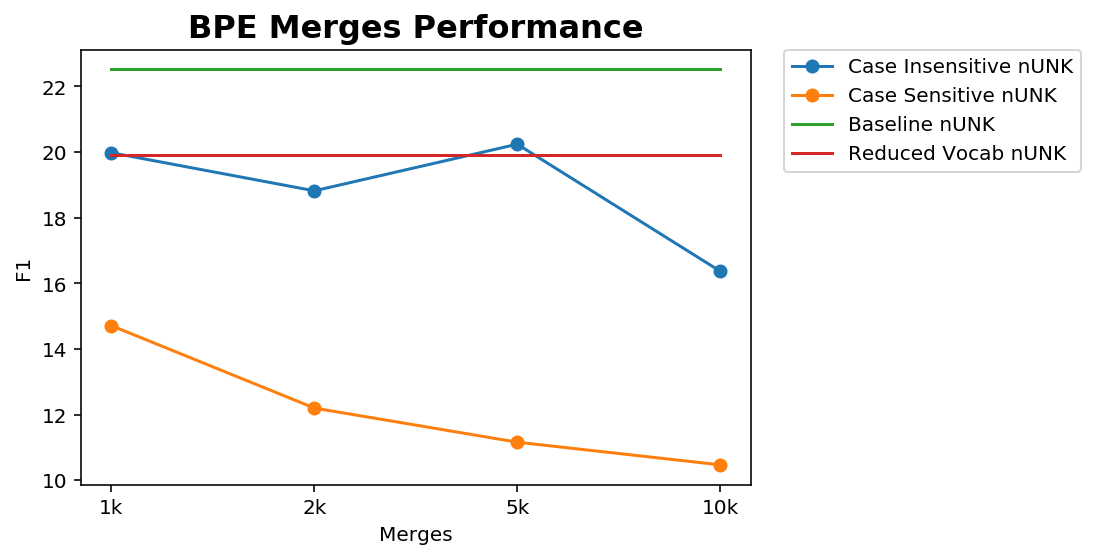

In [36]:
def render_bpe_comparison():
    f = plt.figure()
    X = [39.11,38.55,36.26,33.53]
    Y = [14.71,12.20,11.16,10.47]
    Z = [41.75,41.11,41.71,38.91]
    A = [19.98,18.82,20.24,16.37]
    plt.xticks([0,1,2,3], ('1k', '2k', '5k', '10k'))
# Plotting functionality starts here

    plt.plot(Z, marker='o', label="Case Insensitive UNK")

    plt.plot(X, marker='o', label="Case Sensitive UNK")

    plt.plot([43.56,43.56,43.56,43.56], label="Baseline (no BPE)")

    plt.plot([42.896,42.896,42.896,42.896], label="Reduced Vocab UNK")
# Add legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# Add title and x, y labels
    plt.title("BPE Merges Performance", fontsize=16, fontweight='bold')
#plt.suptitle("Random Walk Suptitle", fontsize=10)
    plt.xlabel("Merges")
    plt.ylabel("F1")
    plt.show()
    f.savefig("figures/bpe_perf_unk.pdf", bbox_inches='tight')
    
    f = plt.figure()
    X = [39.11,38.55,36.26,33.53]
    Y = [14.71,12.20,11.16,10.47]
    Z = [41.75,41.11,41.71,38.91]
    A = [19.98,18.82,20.24,16.37]
    plt.xticks([0,1,2,3], ('1k', '2k', '5k', '10k'))
# Plotting functionality starts here


    plt.plot(A, marker='o', label="Case Insensitive nUNK")

    plt.plot(Y, marker='o', label="Case Sensitive nUNK")
    plt.plot([22.517,22.517,22.517,22.517], label="Baseline nUNK")
    plt.plot([19.8986,19.8986,19.8986,19.8986], label="Reduced Vocab nUNK")
# Add legend
#     plt.legend(loc='best')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# Add title and x, y labels
    plt.title("BPE Merges Performance", fontsize=16, fontweight='bold')
#plt.suptitle("Random Walk Suptitle", fontsize=10)
    plt.xlabel("Merges")
    plt.ylabel("F1")
    plt.show()
    f.savefig("figures/bpe_perf_nunk.pdf", bbox_inches='tight')
render_bpe_comparison()

# Parts Distribution

In [19]:
def load_raw_dataset_counts(input_filename):
    counts = []
    with open(input_filename) as fp:
        for line in fp:
            line = line.rstrip()
            split_line = line.split(" ")
            split_target = split_line[0].split("|")
#             if(len(split_target) > 70):
#                 print(split_target)
            counts.append(len(split_target))
    return counts

def render_parts_distribution(dataset_name, path):
    counts = load_raw_dataset_counts(path)
    print("Data set: ", dataset_name)
    print("Max Part length: ", max(counts))
    print("Avg part length: ", sum(counts)/len(counts))
    print("Min part length: ", min(counts))
    print("Median part length: ", statistics.median(counts))
    
    # fixed bin size
    bins = np.arange(0, 25, 0.5) # fixed bin size
    f = plt.figure()
    plt.xlim([1, 25]) #max(counts)

    plt.hist(counts, bins=bins, alpha=0.5)
    plt.title('Distribution of part lengths')
    plt.xlabel('Number of parts')
    plt.ylabel('Count')

    #plt.show()
    f.savefig("figures/parts_distribution_{}.pdf".format(dataset_name), bbox_inches='tight')

# Vocabulary Analysis

In [20]:
def plot_word_frequency(words, tokens, title):
    sorted_doc = (sorted(tokens.items(), key=operator.itemgetter(1)))[::-1]
    just_the_occur = []
    just_the_rank = []
    word_rank = []
    word_frequency = []
    entry_num = 1
    for entry in sorted_doc:
        if (entry[0] in words):
            word_rank.append(entry_num)
            word_frequency.append(entry[1])

        just_the_rank.append(entry_num)
        entry_num += 1
        just_the_occur.append(entry[1])
    f = plt.figure()
    plt.title("Word Frequencies in " + title)
    plt.ylabel("Total Number of Occurrences")
    plt.xlabel("Rank of word")# (\"" + word + "\" is rank " + str(word_rank) + ")")
    plt.loglog(just_the_rank, just_the_occur, basex=10)
    plt.scatter(
        word_rank,
        word_frequency,
        color="orange",
        marker="o",
        s=100,
        label=words
    )
    #plt.show()
    f.savefig("figures/word_" + words[0] + title + ".pdf", bbox_inches='tight')

In [21]:
def plot_vocab_frequency(tokens, title):
    sorted_doc = (sorted(tokens.items(), key=operator.itemgetter(1)))[::-1]
    just_the_occur = []
    just_the_rank = []
#     word_rank = []
#     word_frequency = []
    entry_num = 1
    for entry in sorted_doc:
        just_the_rank.append(entry_num)
        entry_num += 1
        just_the_occur.append(entry[1])
    f = plt.figure()
    plt.title("Word Frequencies in " + title)
    plt.ylabel("Total Number of Occurrences")
    plt.xlabel("Rank of word")# (\"" + word + "\" is rank " + str(word_rank) + ")")
    plt.loglog(just_the_rank, just_the_occur, basex=10)
#     plt.scatter(
#         word_rank,
#         word_frequency,
#         color="orange",
#         marker="o",
#         s=100,
#         label=words
#     )
    #plt.show()
    f.savefig("figures/vocab_frequences{}.pdf".format(title), bbox_inches='tight')
    

In [22]:
def load_dataset_dictionary(name):
    with open("{}.dict.c2s".format(name), "rb") as file:
        subtoken_to_count = pickle.load(file)
        node_to_count = pickle.load(file)
        target_to_count = pickle.load(file)
        max_contexts = pickle.load(file)
        num_training_examples = pickle.load(file)
        return target_to_count, subtoken_to_count, max_contexts, num_training_examples
    
def create_vocab_dataframe(vocab):
    return pd.DataFrame(vocab.items(), columns=["Word","Frequency"])

def df_freq_lt(df, freq):
    return df[df.Frequency<freq]

In [23]:
def plot_occurences(objects, dataframes, freq):
    vectors = [len(df_freq_lt(df, freq)) for df in dataframes]
    y_pos = np.arange(len(objects))
    f = plt.figure()
    plt.bar(y_pos, vectors, align='center', alpha=0.5)
    plt.title("Number of words with occurences less than " + str(freq))
    plt.ylabel("Total Number of Occurrences")
    plt.xticks(y_pos, objects)

    #plt.show()
    f.savefig("figures/occurences_{}.pdf".format(objects[0]), bbox_inches='tight')

In [24]:
def plot_vocab_sizes():
    camel, cameli, _, _ = load_dataset_dictionary("data/java-small/java-small")
    case_1k, case_1ki, _, _ = load_dataset_dictionary("data/java-small-case-1k/java-small-case-1k")
    case_2k, case_2ki, _, _ = load_dataset_dictionary("data/java-small-case-2k/java-small-case-2k")
    case_5k, case_5ki, _, _ = load_dataset_dictionary("data/java-small-case-5k/java-small-case-5k")
    case_10k, case_10ki, _, _ = load_dataset_dictionary("data/java-small-case-10k/java-small-case-10k")
    nocase_1k, nocase_1ki, _, _ = load_dataset_dictionary("data/java-small-nocase-1k/java-small-nocase-1k")
    nocase_2k, nocase_2ki, _, _ = load_dataset_dictionary("data/java-small-nocase-2k/java-small-nocase-2k")
    nocase_5k, nocase_5ki, _, _ = load_dataset_dictionary("data/java-small-nocase-5k/java-small-nocase-5k")
    nocase_10k, nocase_10ki, _, _ = load_dataset_dictionary("data/java-small-nocase-10k/java-small-nocase-10k")
    
    f = plt.figure()
    plt.title("Vocab sizes")
    plt.xlabel("Total Number of Words")
    plt.ylabel("Data Set")
    plt.axvline(8700,linewidth=1, color='k', ls="--")
    plt.xticks(np.arange(0,13000,1000), ["0","1k","2k","3k","4k","5k","6k","7k","8k","9k","10k","11k", "12k"])
    sizes = [len(camel), len(case_1k), len(case_2k), len(case_5k), len(case_10k), len(nocase_1k), len(nocase_2k), len(nocase_5k), len(nocase_10k)]
    plt.barh(("Camel","1k Case", "2k Case","5k Case", "10k Case", "1k No Case", "2k No Case", "5k No case", "10k No Case"), sizes, align='center', alpha=0.5)
#     plt.show()
    f.savefig("figures/target_vocab_sizes.pdf", bbox_inches='tight')
    
    f = plt.figure()
    plt.title("Vocab sizes")
    plt.xlabel("Total Number of Words")
    plt.ylabel("Data Set")
    plt.axvline(7300,linewidth=1, color='k', ls="--")
    plt.barh(("Camel","1k Case", "2k Case","5k Case", "10k Case", "1k No Case", "2k No Case", "5k No case", "10k No Case"), sizes, align='center', alpha=0.5)
#     plt.show()
    f.savefig("figures/source_vocab_sizes.pdf", bbox_inches='tight')

15444  target tokens are OOV. Meaning  58.61767943219341 % of target tokens are OOV.


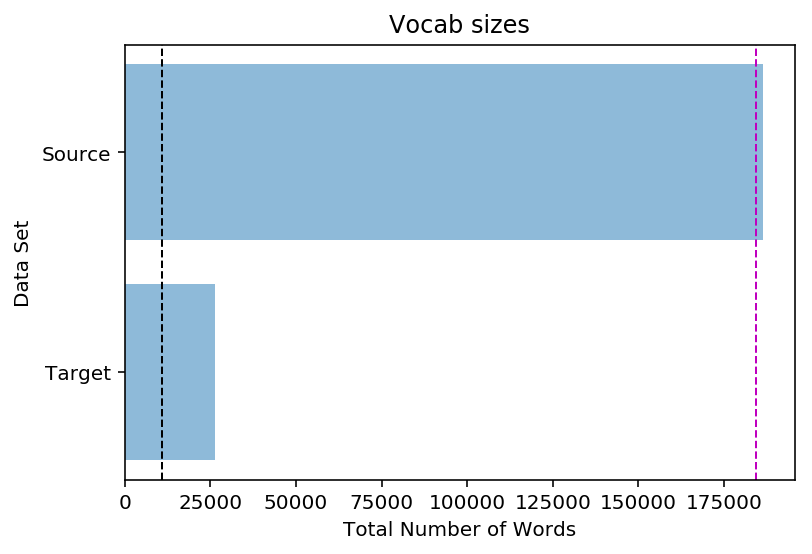

In [16]:
def plot_med_vocab_sizes():
    camel, cameli, _, _ = load_dataset_dictionary("java-med/java-med")
  
    f = plt.figure()
    plt.title("Vocab sizes")
    plt.xlabel("Total Number of Words")
    plt.ylabel("Data Set")
    plt.axvline(10903,linewidth=1, color='k', ls="--")
    plt.axvline(184379,linewidth=1, color='m', ls="--")
#     plt.xticks(np.arange(0,13000,1000), ["0","1k","2k","3k","4k","5k","6k","7k","8k","9k","10k","11k", "12k"])
    sizes = [len(camel),len(cameli)]
    plt.barh(("Target", "Source"), sizes, align='center', alpha=0.5)
#     plt.show()
    f.savefig("figures/target_med_vocab_sizes.pdf", bbox_inches='tight')
    print(len(camel)-10903, " target tokens are OOV. Meaning ", (15444/len(camel)*100), "% of target tokens are OOV.")
plot_med_vocab_sizes()

In [26]:
target_tokens, source_subtokens, max_contexts, num_training_examples = load_dataset_dictionary("data/java-small/java-small")
target_df = create_vocab_dataframe(target_tokens)
source_df = create_vocab_dataframe(source_subtokens)

In [27]:
target_tokens_nocase_1k, source_subtokens_nocase_1k, _, _ = load_dataset_dictionary("data/java-small-nocase-1k/java-small-nocase-1k")
target_df_nocase_1k = create_vocab_dataframe(target_tokens_nocase_1k)
source_df_nocase_1k = create_vocab_dataframe(source_subtokens_nocase_1k)

In [54]:
target_tokens_nocase_2k, source_subtokens_nocase_2k, _, _ = load_dataset_dictionary("data/java-small-nocase-2k/java-small-nocase-2k")
target_df_nocase_2k = create_vocab_dataframe(target_tokens_nocase_2k)
source_df_nocase_2k = create_vocab_dataframe(source_subtokens_nocase_2k)

In [55]:
target_tokens_nocase_5k, source_subtokens_nocase_5k, _, _ = load_dataset_dictionary("data/java-small-nocase-5k/java-small-nocase-5k")
target_df_nocase_5k = create_vocab_dataframe(target_tokens_nocase_5k)
source_df_nocase_5k = create_vocab_dataframe(source_subtokens_nocase_5k)

In [56]:
target_tokens_nocase_10k, source_subtokens_nocase_10k, _, _ = load_dataset_dictionary("data/java-small-nocase-10k/java-small-nocase-10k")
target_df_nocase_10k = create_vocab_dataframe(target_tokens_nocase_10k)
source_df_nocase_10k = create_vocab_dataframe(source_subtokens_nocase_10k)

In [57]:
target_tokens_case_1k, source_subtokens_case_1k, _, _ = load_dataset_dictionary("data/java-small-case-1k/java-small-case-1k")
target_df_case_1k = create_vocab_dataframe(target_tokens_case_1k)
source_df_case_1k = create_vocab_dataframe(source_subtokens_case_1k)

In [58]:
target_tokens_case_2k, source_subtokens_case_2k, _, _ = load_dataset_dictionary("data/java-small-case-2k/java-small-case-2k")
target_df_case_2k = create_vocab_dataframe(target_tokens_case_2k)
source_df_case_2k = create_vocab_dataframe(source_subtokens_case_2k)

In [59]:
target_tokens_case_5k, source_subtokens_case_5k, _, _ = load_dataset_dictionary("data/java-small-case-5k/java-small-case-5k")
target_df_case_5k = create_vocab_dataframe(target_tokens_case_5k)
source_df_case_5k = create_vocab_dataframe(source_subtokens_case_5k)

In [60]:
target_tokens_case_10k, source_subtokens_case_10k, _, _ = load_dataset_dictionary("data/java-small-case-10k/java-small-case-10k")
target_df_case_10k = create_vocab_dataframe(target_tokens_case_10k)
source_df_case_10k = create_vocab_dataframe(source_subtokens_case_10k)

In [ ]:
source_df.iloc[::-1]

## Word frequencies by dataset

In [45]:
# plot_word_frequency(["get"], target_tokens, "camel Split")

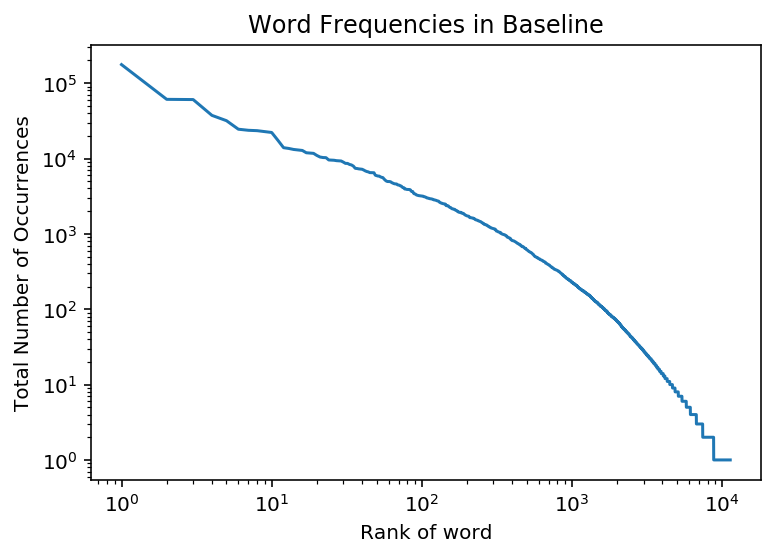

In [61]:
plot_vocab_frequency(target_tokens, "Baseline")

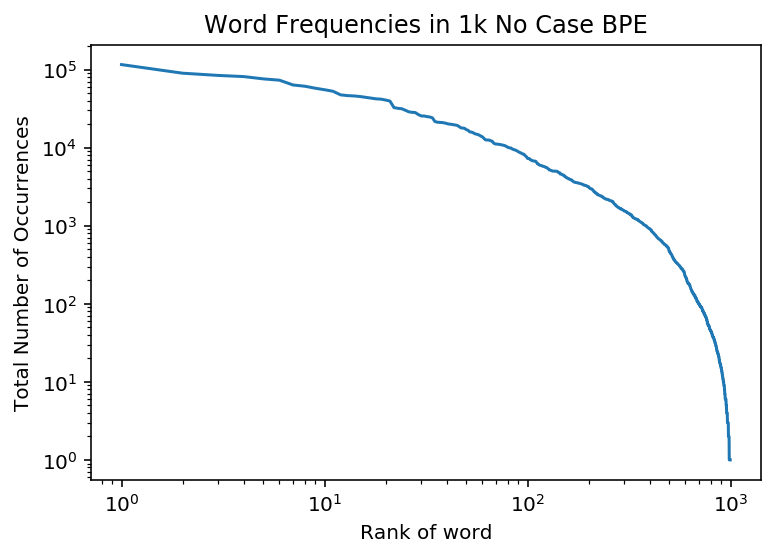

In [62]:
plot_vocab_frequency(target_tokens_nocase_1k, "1k No Case BPE")

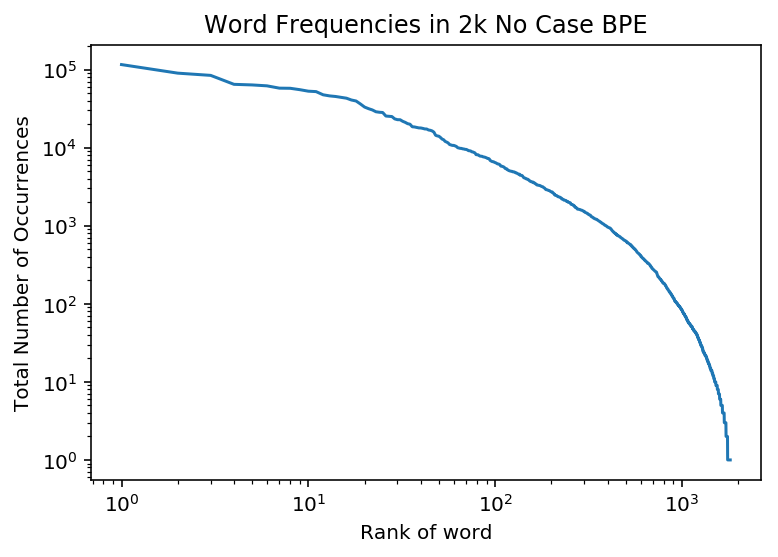

In [63]:
plot_vocab_frequency(target_tokens_nocase_2k, "2k No Case BPE")

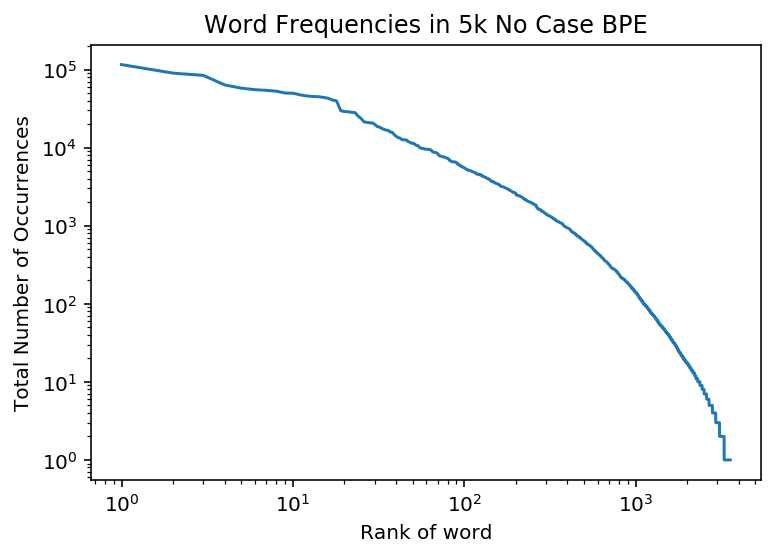

In [64]:
plot_vocab_frequency(target_tokens_nocase_5k, "5k No Case BPE")

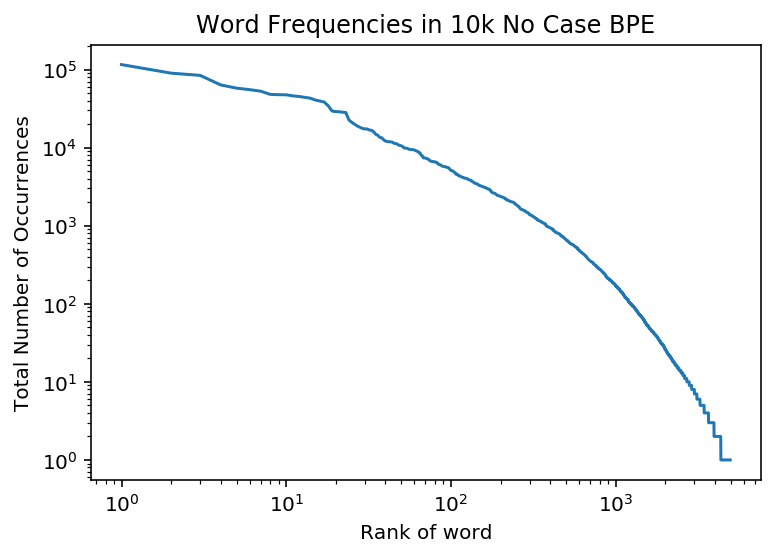

In [65]:
plot_vocab_frequency(target_tokens_nocase_10k, "10k No Case BPE")

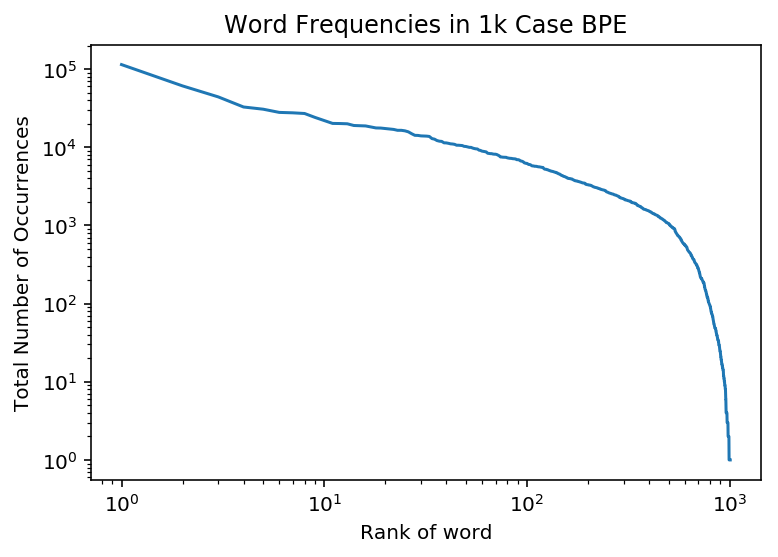

In [66]:
plot_vocab_frequency(target_tokens_case_1k, "1k Case BPE")

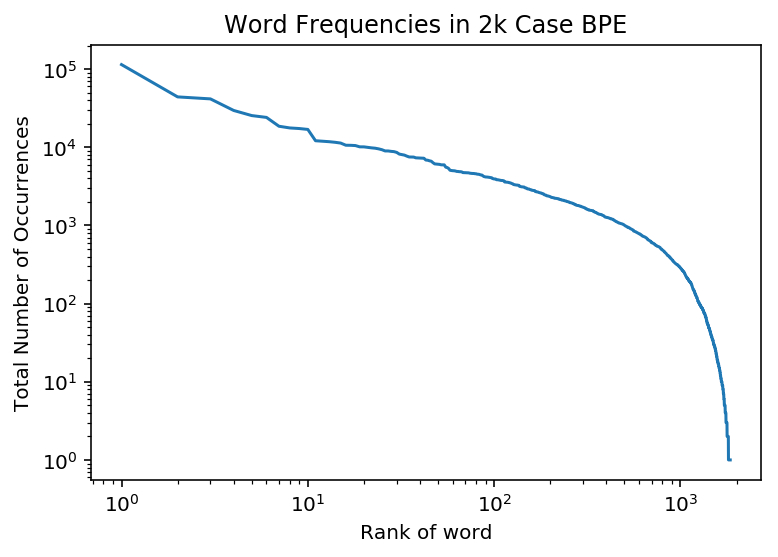

In [67]:
plot_vocab_frequency(target_tokens_case_2k, "2k Case BPE")

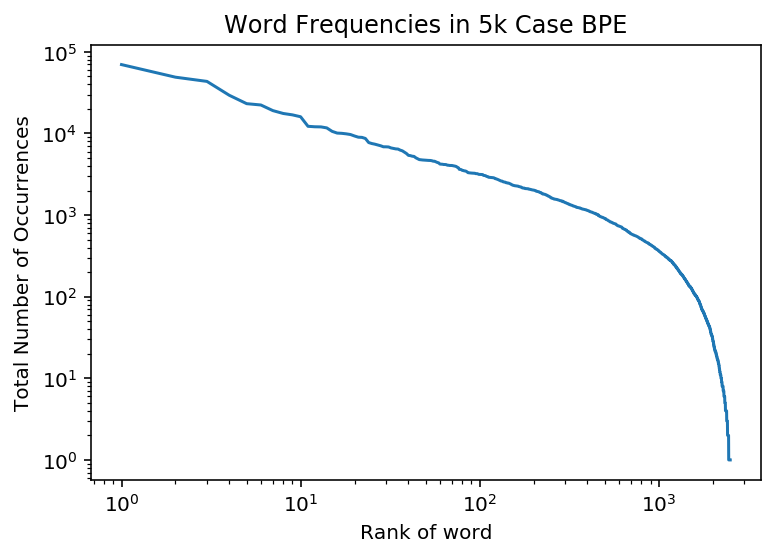

In [68]:
plot_vocab_frequency(target_tokens_case_5k, "5k Case BPE")

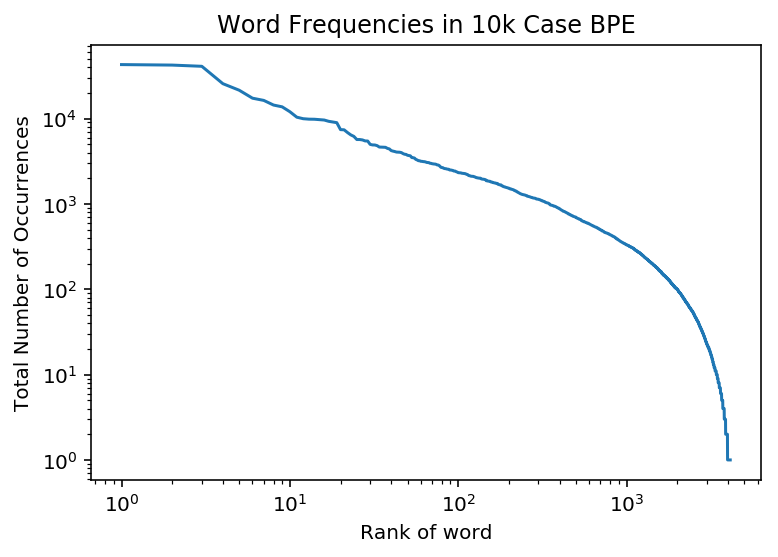

In [69]:
plot_vocab_frequency(target_tokens_case_10k, "10k Case BPE")

## Number of rare words

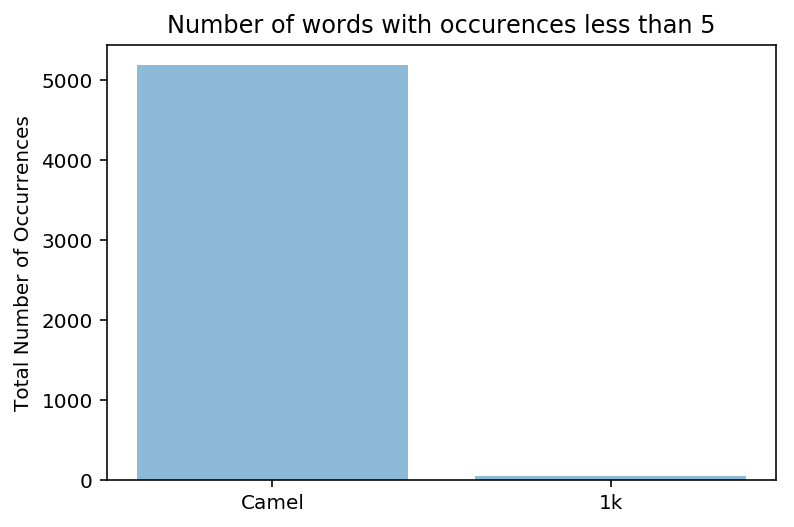

In [29]:
plot_occurences(("Camel","1k"), [target_df, target_df_nocase_1k], 5)

## True vocab size of source and target tokens, capped size

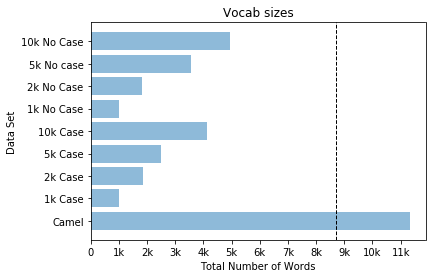

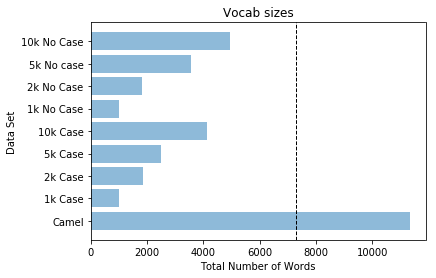

In [24]:
plot_vocab_sizes()

## Min, max, avg part length

Data set:  Pico BPE
Max Part length:  36
Avg part length:  5.167778836987607
Min part length:  1
Median part length:  4


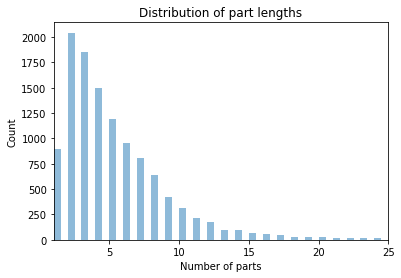

In [43]:
render_parts_distribution("Pico BPE", "preprocessing/java-pico-test-target-only.train.raw.txt.bpe.full.txt")

Data set:  java-small 1K Case
Max Part length:  98
Avg part length:  5.137257706743816
Min part length:  1
Median part length:  4


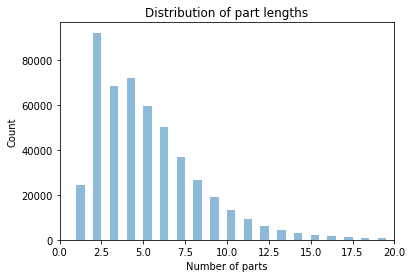

In [38]:
render_parts_distribution("java-small 1K Case", "data/java-small-case-1k/java-small-case-1k.train.c2s")

Data set:  java-small 2K Case
Max Part length:  97
Avg part length:  4.124645664056283
Min part length:  1
Median part length:  3


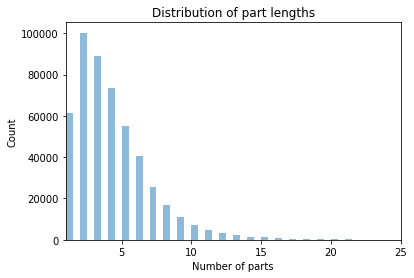

In [35]:
render_parts_distribution("java-small 2K Case", "data/java-small-case-2k/java-small-case-2k.train.c2s")

Data set:  java-small 5K Case
Max Part length:  74
Avg part length:  3.794762174348395
Min part length:  1
Median part length:  3


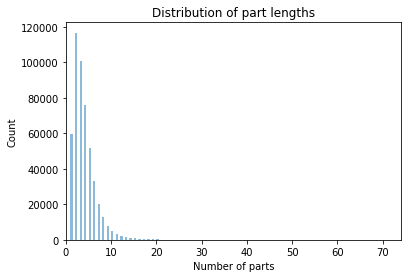

In [29]:
render_parts_distribution("java-small 5K Case", "data/java-small-case-5k/java-small-case-5k.train.c2s")

Data set:  java-small 10K Case
Max Part length:  72
Avg part length:  3.2659509097392774
Min part length:  1
Median part length:  3


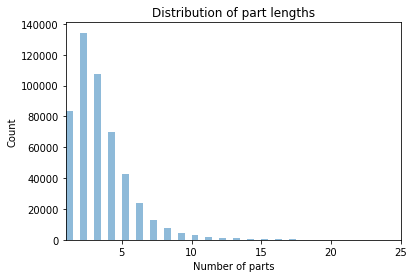

In [36]:
render_parts_distribution("java-small 10K Case", "data/java-small-case-10k/java-small-case-10k.train.c2s")

Data set:  java-small No BPE
Max Part length:  38
Avg part length:  2.914881194958192
Min part length:  1
Median part length:  3.0


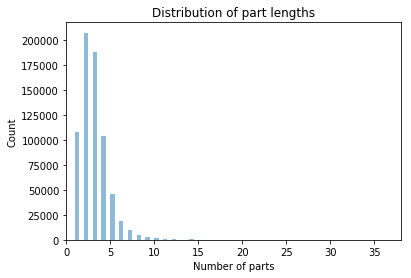

In [31]:
render_parts_distribution("java-small No BPE", "data/java-small/java-small.train.c2s")

Data set:  java-med No BPE
Max Part length:  40
Avg part length:  2.817248987261473
Min part length:  1
Median part length:  2.0


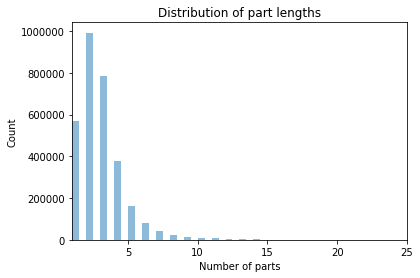

In [107]:
render_parts_distribution("java-med No BPE", "java-med/java-med.train.c2s")

Data set:  java-small 1K No Case
Max Part length:  126
Avg part length:  6.85809034332559
Min part length:  1
Median part length:  6


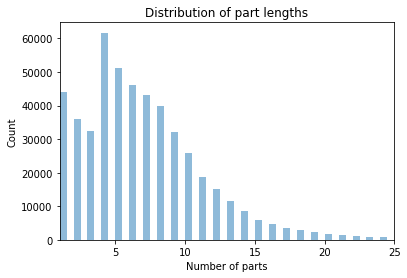

In [37]:
render_parts_distribution("java-small 1K No Case", "data/java-small-nocase-1k/java-small-nocase-1k.train.c2s")

Data set:  java-small 2K No Case
Max Part length:  120
Avg part length:  6.372963890472669
Min part length:  1
Median part length:  6


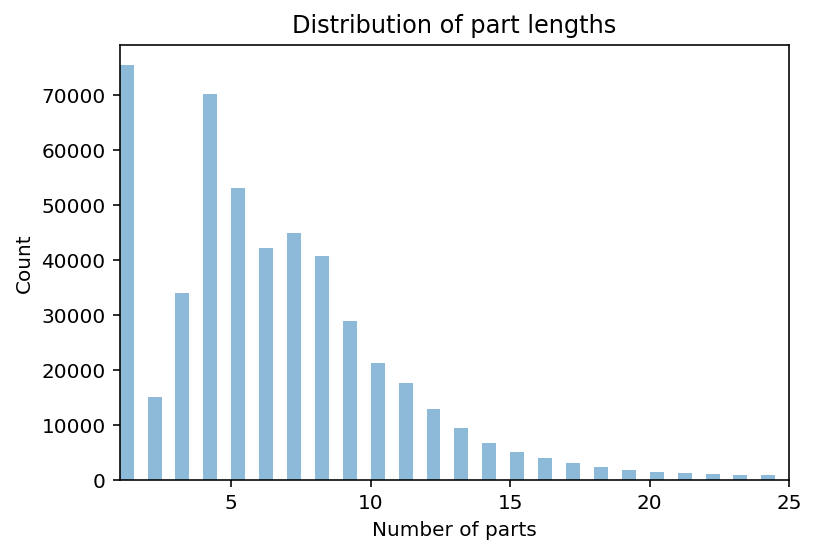

In [44]:
render_parts_distribution("java-small 2K No Case", "data/java-small-nocase-2k/java-small-nocase-2k.train.c2s")

Data set:  java-small 5K No Case
Max Part length:  111
Avg part length:  6.001535203918195
Min part length:  1
Median part length:  5


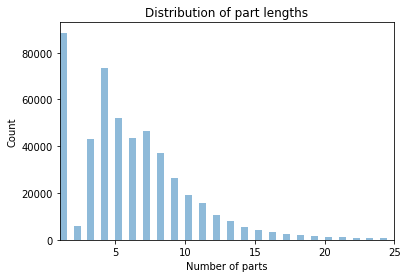

In [38]:
render_parts_distribution("java-small 5K No Case", "data/java-small-nocase-5k/java-small-nocase-5k.train.c2s")

Data set:  java-small 10K No Case
Max Part length:  106
Avg part length:  5.801094386835123
Min part length:  1
Median part length:  5


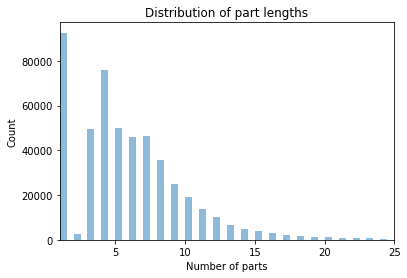

In [39]:
render_parts_distribution("java-small 10K No Case", "data/java-small-nocase-10k/java-small-nocase-10k.train.c2s")

## Performance of BPE models

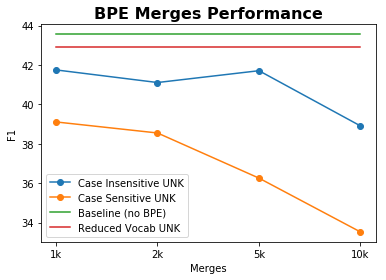

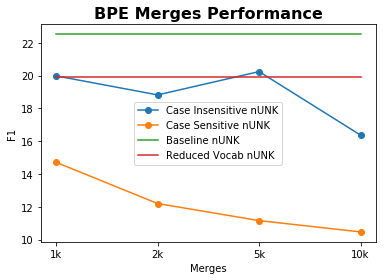

In [14]:
render_bpe_comparison()

How often do out of vocabulary words actually occur in dataset?
What was your X?
Train on correct splits
unforeseen consequences? look at some predictions manually. take 100 predictions.
talk about predictions in general, swapped, etc. 10 examples for discussion
add prec, recall, etc. to table
Original name:  create|P|ree|mp|ted|C|ont|ain|er|S|t|at|us
Predicted:  ['create', 'S', 't', 'at', 'us', 'C', 'ont', 'ain', 'er', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']
Filtered original:  ['create', 'P', 'ree', 'mp', 'ted', 'C', 'ont', 'ain', 'er', 'S', 't', 'at', 'us']
Filtered predicted name:  ['create', 'S', 't', 'at', 'us', 'C', 'ont', 'ain', 'er']
Per pred: True pos: 9, False pos: 0, False neg: 4
fix issue issue of get Reply being split to get R eply. score prediction at level of words i.e. concat and split by camel
    
    How does BPE work? merges?
    How does attention work?
    
# Scribbles to be ignored
## Java-small, med, large, bpe 1k, 2k, 5k, 10k, case, no case

java-small
config.SUBTOKENS_VOCAB_MAX_SIZE = 7300
config.TARGET_VOCAB_MAX_SIZE = 8700

java-med (presumed)
config.SUBTOKENS_VOCAB_MAX_SIZE = 184379
config.TARGET_VOCAB_MAX_SIZE = 10903

java-large (presumed)
config.SUBTOKENS_VOCAB_MAX_SIZE = 190000
config.TARGET_VOCAB_MAX_SIZE = 27000

## Number of words lost by cap